## TASK I

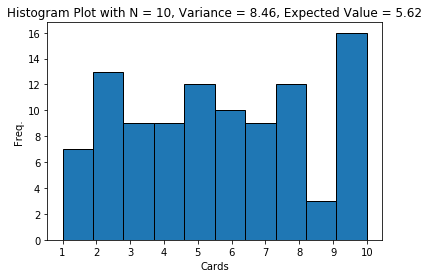

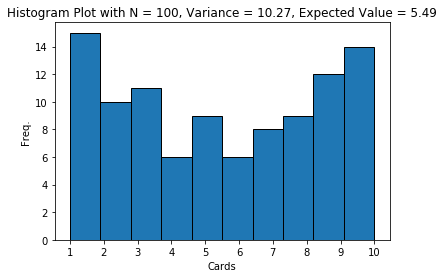

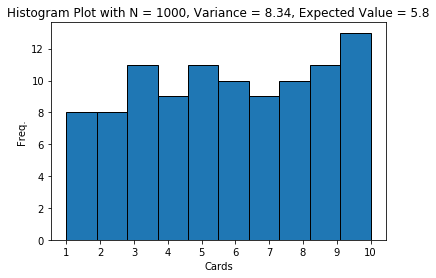

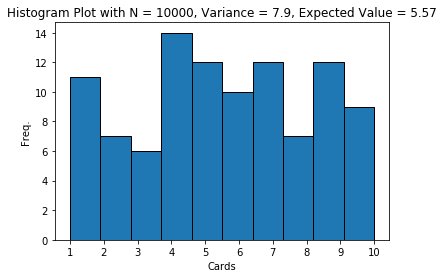

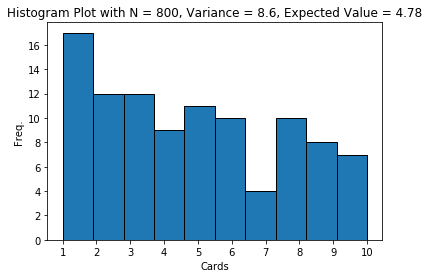

In [71]:
from statistics import variance
import numpy as np
import matplotlib.pyplot as plt

def calc_Expectation(a, n): 
      
    # variable prb is for probability  
    # of each element which is same for 
    # each element  
    prb = 1 / n 
      
    # calculating expectation overall 
    sum = 0
    for i in range(0, n): 
        sum += (a[i] * prb)         
    # returning expectation as sum 
    return float(sum)


def HistPlot(N):
    Cards = [1,2,3,4,5,6,7,8,9,10]
    Deck = []

    for i in range(100):
        y = np.random.randint(1, 11)
        Deck.append(y)  
    v = round(variance(Deck),2) # calculate varience

    #plt.bar(Cards, Deck,color='b')
    
    plt.hist(Deck, bins=10, edgecolor = 'black')
    plt.xticks(Cards)
    plt.xlabel('Cards')
    plt.ylabel('Freq.')
    expect = calc_Expectation(Deck, len(Deck))
    s = "Histogram Plot with N = " + str(N) + ", Variance = " + str(v)+", Expected Value = " + str(round(expect,2))

    plt.title(s)
    plt.show()
    #print(Deck) Deck check

HistPlot(10)
HistPlot(100)
HistPlot(1000)
HistPlot(10000)
HistPlot(800)

## TASK II

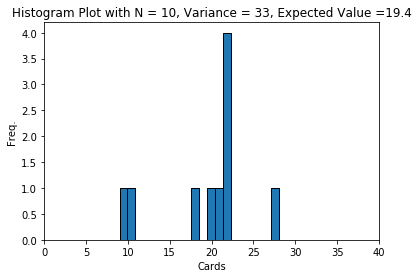

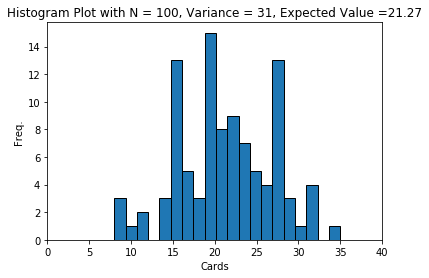

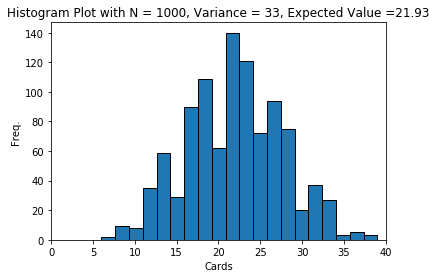

In [2]:
from statistics import variance
import numpy as np
import matplotlib.pyplot as plt
def HistPlot(N):
      Cards = [1,2,3,4,5,6,7,8,9,10]
      Deck = ([0])*10
      sum=0
      summations=[]
      for i in range(0,N):
        X = np.random.randint(1, 11, (10))
        for i in X[:4]:
            sum +=i
        summations.append(sum)
        sum=0
       
      v = round(variance(summations),2)

      #plt.bar(Cards, Deck,color='b')
      plt.hist(summations, bins=20, edgecolor = 'black')
      plt.xlabel('Cards')
      plt.ylabel('Freq.')
      expect = calc_Expectation(summations, N)
      s = "Histogram Plot with N = " + str(N) + ", Variance = " + str(v) +", Expected Value =" + str(round(expect,2))
    
      plt.xlim(0,40)
      plt.title(s)
      plt.show()

def calc_Expectation(a, n): 
    # variable prb is for probability  
    # of each element which is same for 
    # each element  
    prb = 1 / n 
    # calculating expectation overall 
    sum = 0
    for i in range(0, n): 
        sum += (a[i] * prb)         
    # returning expectation as sum 
    return float(sum)  
            
HistPlot(10)
HistPlot(100)
HistPlot(1000)

## TASK III

In [3]:
from statistics import variance
import numpy as np
import matplotlib.pyplot as plt
#Flip a weighted coin N times and get number of tails, repeat num_sims times to get a variance
def flip_weighted_coins(p=0.5,N=100,num_sims=1000):
    rand_nums = np.random.random(size=(num_sims,N))#get an array of shape (N,num_sims) filled with random numbers between 0 to 1
    wasTails = rand_nums <p #get whether coin flip was heads or tails (chance of tails is p)
    numTails = np.sum(wasTails,axis=1)#Take sum across columns will give array of shape (num_sims,)
    
    meanUp = np.mean(numTails)#get a scalar number that contains the mean number of tails that occured across the number of simulations
    varUp = np.var(numTails)#get the variance of the total coin flips
    
    return meanUp,varUp

ps = [0.1,0.2,0.3,0.4,0.5] #created probabilities to test from 0.1,0.2,...0.9
Ns = [1,10,100,1000,10000]
num_sims = 1000

experimental_meanXs = []
experimental_varXs = []
expected_valueXs = []
for p in ps:
    for N in Ns:
        meanX,varX = flip_weighted_coins(p,N,num_sims)
        experimental_meanXs.append(meanX)
        experimental_varXs.append(varX)
        #expected_valueXs.append(N*p)

print("Number of Tails Table")
headers = ["p","N","Expected Value","Mean","Variance"]
header_format = "{:<15}"*5
print(header_format.format(*headers))
i = 0#index for lists
for p in ps:
    for N in Ns:
        print("{:<15.2f}{:<15d}{:<15.2f}{:<15.2f}{:<15.2f}".format(p,N,N*p,experimental_meanXs[i],experimental_varXs[i]))
        i+=1

Number of Tails Table
p              N              Expected Value Mean           Variance       
0.10           1              0.10           0.10           0.09           
0.10           10             1.00           0.94           0.89           
0.10           100            10.00          10.02          9.23           
0.10           1000           100.00         100.06         86.91          
0.10           10000          1000.00        1000.15        930.19         
0.20           1              0.20           0.20           0.16           
0.20           10             2.00           1.98           1.55           
0.20           100            20.00          19.98          16.60          
0.20           1000           200.00         200.44         150.91         
0.20           10000          2000.00        2001.27        1644.22        
0.30           1              0.30           0.26           0.19           
0.30           10             3.00           3.04           2.17  

## TASK IV

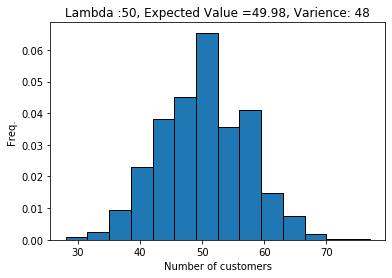

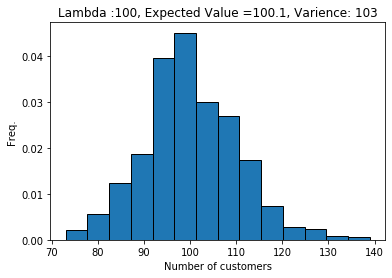

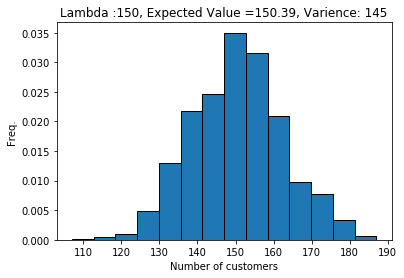

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def calc_Expectation(a, n): 
      
    # variable prb is for probability  
    # of each element which is same for 
    # each element  
    prb = 1 / n 
      
    # calculating expectation overall 
    sum = 0
    for i in range(0, n): 
        sum += (a[i] * prb)         
    # returning expectation as sum 
    return float(sum)


def draw_psn(lmd):    
    s = np.random.poisson(lmd, 1000)
    count, bins, ignored = plt.hist(s, 14, edgecolor= 'black', density=True)
    expect= calc_Expectation(s, len(s))
    v = round(variance(s),2)
    title = "Lambda :" + str(lmd) + ", Expected Value =" + str(round(expect,2)) + ", Varience: " + str(v)
    plt.xlabel('Number of customers')
    plt.ylabel('Freq.')
    plt.title(title)
    plt.show()
    
    
draw_psn(50)
draw_psn(100)
draw_psn(150)

## TASK V

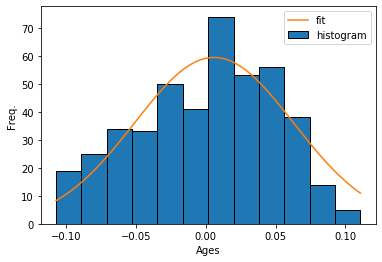

In [42]:
from sklearn.datasets import load_diabetes
from statistics import variance
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

diabetes = load_diabetes()
# Load diabetes data into a dataframe and set the field names
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df.head()

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)
bin_heights, bin_borders, _ = plt.hist(df['age'],bins='auto',edgecolor='black',label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
plt.xlabel('Ages')
plt.ylabel('Freq.')
plt.legend()